In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import skew

pd.set_option('display.max_columns', None)

In [4]:
heart_attack_2020 = pd.read_csv(r'C:\Users\Hp\Documents\Machine_learning_projects\heart_attack_predictions\0_datasets\2020\heart_2020.csv')
# replaceing some values with ordered ones
mapping = {'Poor': '0_Poor', 'Fair': '1_Fair', 'Good': '2_Good', 'Very good': '3_Very good', 'Excellent': '4_Excellent'}
heart_attack_2020['GenHealth'] = heart_attack_2020['GenHealth'].replace(mapping)

heart_attack_2020.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,3_Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,3_Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,1_Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,2_Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,3_Very good,8.0,No,No,No


In [5]:
heart_attack_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Missing values

In [6]:
# There are no missing values 
heart_attack_2020.isna().sum().sort_values(ascending=False).head()

HeartDisease     0
BMI              0
KidneyDisease    0
Asthma           0
SleepTime        0
dtype: int64

# Features distribution

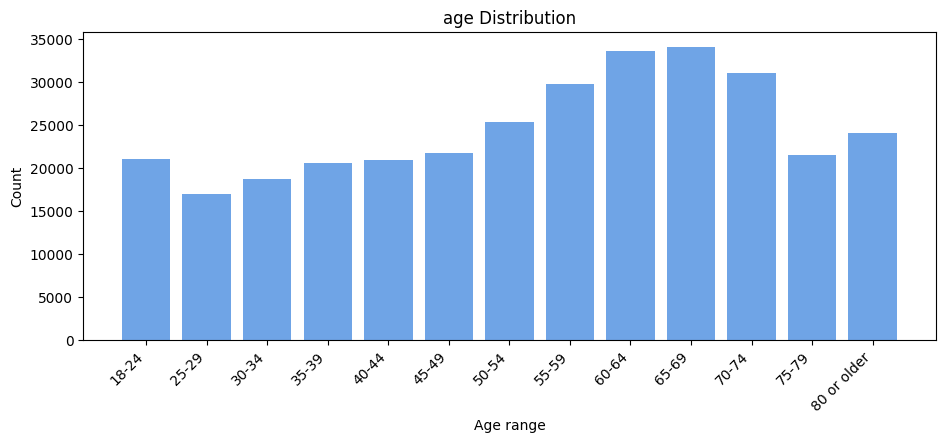

In [7]:
ages = heart_attack_2020['AgeCategory'].value_counts().sort_index()
# Creating the barplot
plt.figure(figsize=(11, 4))
plt.bar(list(ages.index), ages.values, color='#6fa4e6')
plt.xlabel('Age range')
plt.ylabel('Count')
plt.title('age Distribution')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()

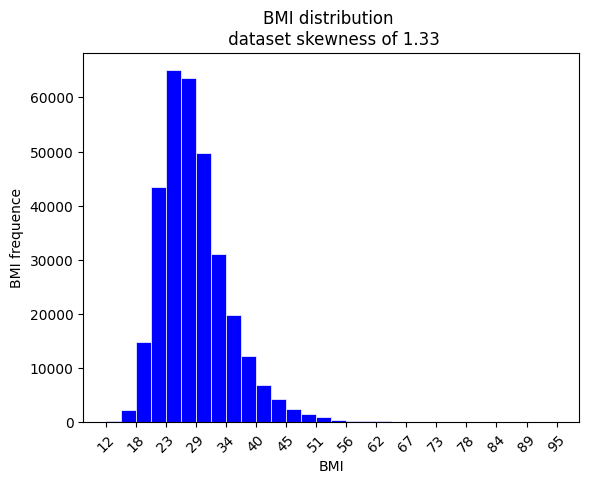

In [8]:
n, bins, patches = plt.hist(heart_attack_2020['BMI'], bins=30, color='b', edgecolor='white', linewidth=0.5)
plt.xticks(bins[::2], labels=np.around(bins[::2]).astype(int), rotation=45) 
plt.ylabel("BMI frequence")
plt.xlabel("BMI")
plt.title(f"BMI distribution \n dataset skewness of {np.around(skew(heart_attack_2020['BMI']), decimals=2)}")
plt.show()

The BMI is positively skewed, for this reason we will test transforming the data with a logarithmic transformation.

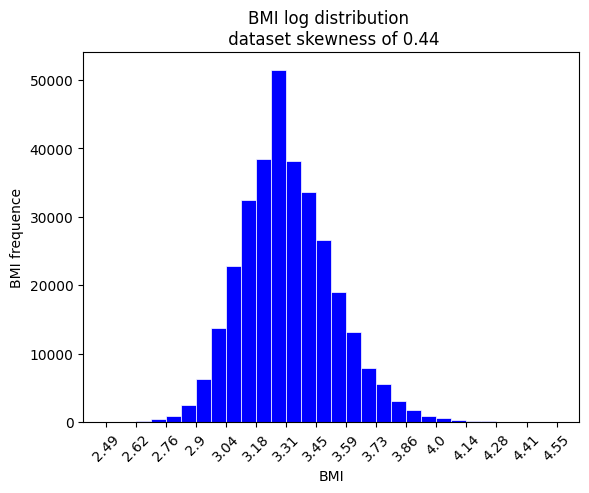

In [9]:
heart_attack_2020['BMI_log'] = np.log(heart_attack_2020['BMI'])
n, bins, patches = plt.hist(heart_attack_2020['BMI_log'], bins=30, color='b', edgecolor='white', linewidth=0.5)
plt.xticks(bins[::2], labels=np.round(bins[::2], decimals=2), rotation=45) 
plt.ylabel("BMI frequence")
plt.xlabel("BMI")
plt.title(f"BMI log distribution \n dataset skewness of {np.round(skew(heart_attack_2020['BMI_log']), decimals=2)}")
plt.show()

In [10]:
heart_attack_2020['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [11]:
heart_attack_2020['Sex'].value_counts()

Sex
Female    167805
Male      151990
Name: count, dtype: int64

In [12]:
heart_attack_2020['GenHealth'].value_counts()

GenHealth
3_Very good    113858
2_Good          93129
4_Excellent     66842
1_Fair          34677
0_Poor          11289
Name: count, dtype: int64

In [13]:
heart_attack_2020['PhysicalActivity'].value_counts()

PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64

In [14]:
heart_attack_2020['Smoking'].value_counts()

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

In [15]:
heart_attack_2020['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

In [16]:
heart_attack_2020.loc[heart_attack_2020['SleepTime'] > 10, 'SleepTime'] = 11
heart_attack_2020['SleepTime'].value_counts()

SleepTime
7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
11.0     3619
3.0      1992
2.0       788
1.0       551
Name: count, dtype: int64

# Visualizing the correlation between categorical variables and heart attack

In [17]:
def plot_categorical_barplot(data_df, x_feature, y, rotation=0):
    '''
    plots the barplot of the percentage of each x feature relative to the value of each y
    '''
    # calculating the number of y labels for each x_feature
    count_df = data_df[[y, x_feature]].groupby([y, x_feature]).size().reset_index(name='Count')
    count_x_label = data_df[[x_feature]].groupby([x_feature]).size().reset_index(name='count_x_label')
    count_df = count_df.merge(count_x_label, on=x_feature)
    #calculating the proportion of y labels for each x_feature
    count_df['Percentage'] = count_df['Count']/count_df['count_x_label']
    plt.figure(figsize=(8, 6))
    sns.barplot(x=x_feature, y='Percentage', hue=y, data=count_df)
    plt.xticks(rotation=rotation)
    plt.xlabel(x_feature)
    plt.ylabel('Percentage')
    plt.show()

In [18]:
def plot_pivot_tab(df, x, HH, rotation=0, distance=0.5):
    pivot_table = pd.crosstab(df[HH], df[x])
    print(pivot_table)
    for column in pivot_table.columns:
        pivot_table[column] = pivot_table[column]/pivot_table[column].sum()
    
    # Catplot for 'No' HeartDisease
    plt.subplot(2, 1, 1)
    plt.grid()
    plt.bar(pivot_table.columns, pivot_table.loc['No'].values, color='g', zorder=10)
    plt.ylabel('Percentage')
    plt.xticks(rotation=rotation)
    plt.xlabel(x)
    plt.title('Percentages of people in the groups of'+ x +' who did not have an heart attack')

    # Catplot for 'Yes' HeartDisease
    plt.subplot(2, 1, 2)
    # add grid in background
    plt.grid()
    plt.bar(pivot_table.columns, pivot_table.loc['Yes'].values, color='r', zorder=10)
    plt.xticks(rotation=rotation)
    plt.xlabel(x)
    plt.title('Percentages of people in the groups of'+ x +' who did had an heart attack')
    plt.ylabel('Percentage')
    
    plt.subplots_adjust(hspace=distance)
    plt.show()


## Age

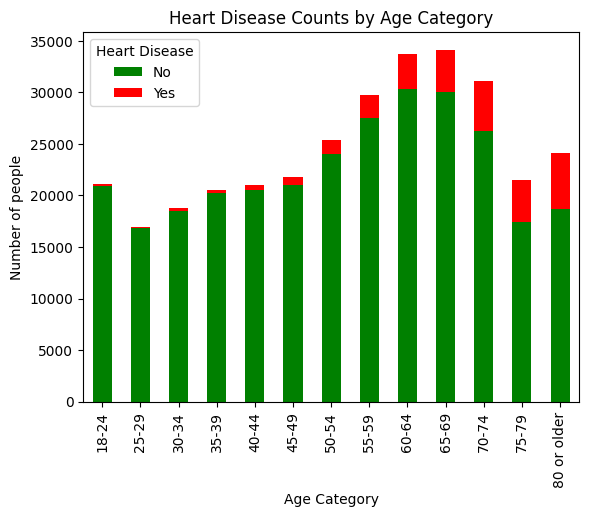

In [19]:
# Creating a DataFrame with the count of occurrences for each combination of 'agecategory' and 'heartdisease'
df_counts = heart_attack_2020.groupby(['AgeCategory', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the histogram
ax = df_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
# Adding labels and titles
plt.xlabel('Age Category')
plt.ylabel('Number of people')
plt.title('Heart Disease Counts by Age Category')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

It's less probable to have an heart attack before 44 yo

# BMI

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


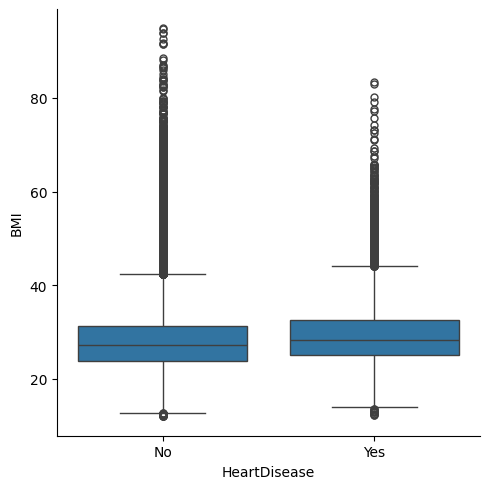

In [20]:
sns.catplot(x='HeartDisease', y="BMI",
            data=heart_attack_2020,
            kind="box",
)


In [21]:
intervalli_bmi = [0,10,20,30,40,50,60,70,80,90,100]

count_df = heart_attack_2020[['BMI', 'HeartDisease']].copy()
count_df['bmi_interval'] = pd.cut(count_df['BMI'], bins=intervalli_bmi, right=False).astype(str)
count_interval = count_df.groupby(['bmi_interval']).size().reset_index(name='total_Count')
count_df = count_df.merge(count_interval, on='bmi_interval')
count_bmi = count_df[['BMI', 'HeartDisease']].groupby(['BMI']).size().reset_index(name='count_x_label')
count_yes_no = count_df.groupby(['bmi_interval','HeartDisease']).size().reset_index(name='count_yes_no')
count_df = count_df.merge(count_yes_no, on=['bmi_interval','HeartDisease'])
count_df['Percentage'] = count_df['count_yes_no']/count_df['total_Count']
count_df = count_df.drop(['BMI'], axis=1).drop_duplicates()
count_df.head()

,HeartDisease,bmi_interval,total_Count,count_yes_no,Percentage
0,No,"[10, 20)",14633,13670,0.934190
13670,Yes,"[10, 20)",14633,963,0.065810
14633,No,"[20, 30)",202320,186582,0.922212
201215,Yes,"[20, 30)",202320,15738,0.077788
216953,No,"[30, 40)",86457,77597,0.897521


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


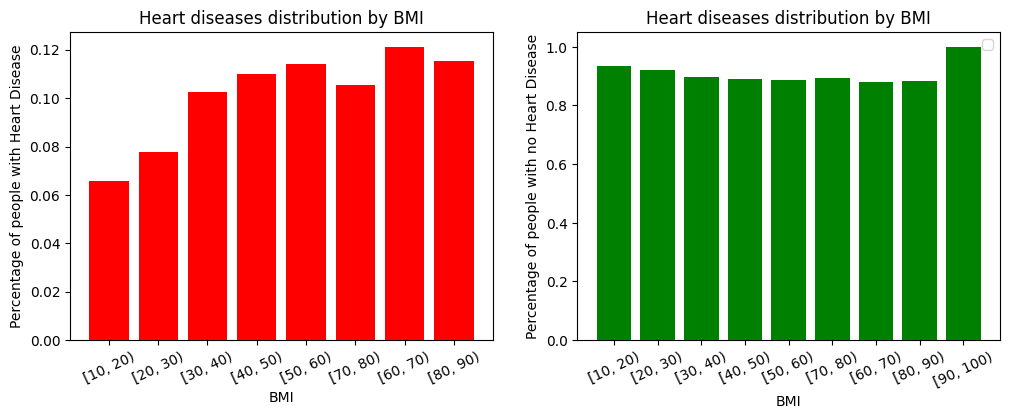

In [22]:

#calculating the proportion of y labels for each x_feature
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(count_df[count_df['HeartDisease']=='Yes']['bmi_interval'], count_df[count_df['HeartDisease']=='Yes']['Percentage'], color='r', zorder=10)
plt.xlabel('BMI')
plt.xticks(rotation=25)
plt.ylabel('Percentage of people with Heart Disease')
plt.title('Heart diseases distribution by BMI')

plt.subplot(1, 2, 2)
plt.bar(count_df[count_df['HeartDisease']=='No']['bmi_interval'], count_df[count_df['HeartDisease']=='No']['Percentage'], color='g', zorder=10)
plt.xlabel('BMI')
plt.xticks(rotation=25)
plt.ylabel('Percentage of people with no Heart Disease')
plt.title('Heart diseases distribution by BMI')
plt.legend()

Having a lower BMI prevents Heart diseases

# Sex

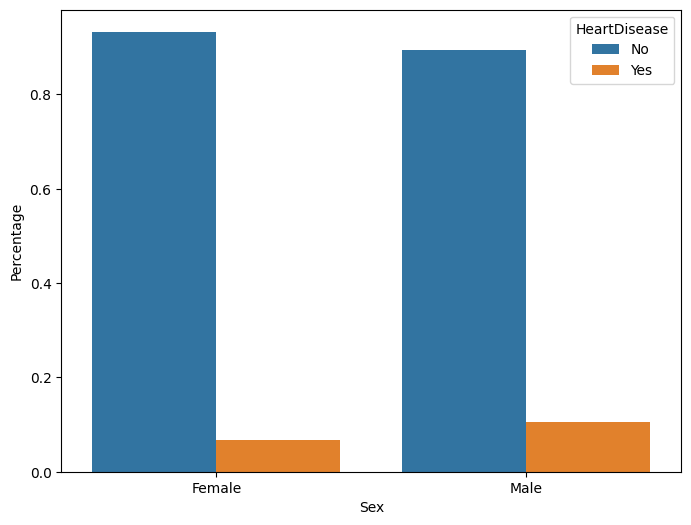

In [23]:
plot_categorical_barplot(heart_attack_2020, 'Sex', 'HeartDisease')

Sex           Female    Male
HeartDisease                
No            156571  135851
Yes            11234   16139


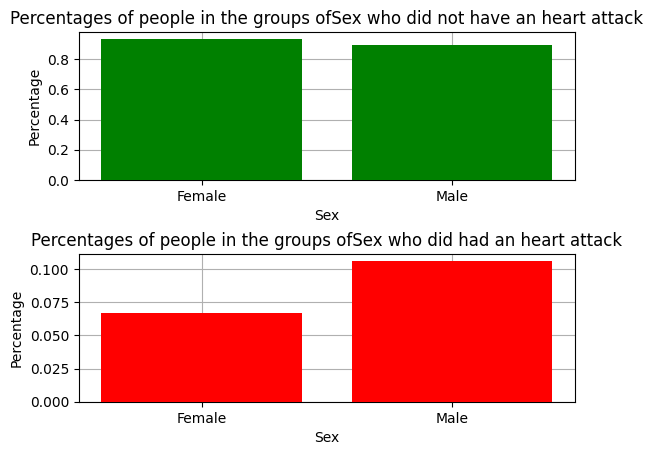

In [24]:
plot_pivot_tab(heart_attack_2020, 'Sex', 'HeartDisease')

From these data it appears that women are less susceptible to heart problems than man.

## Smokers

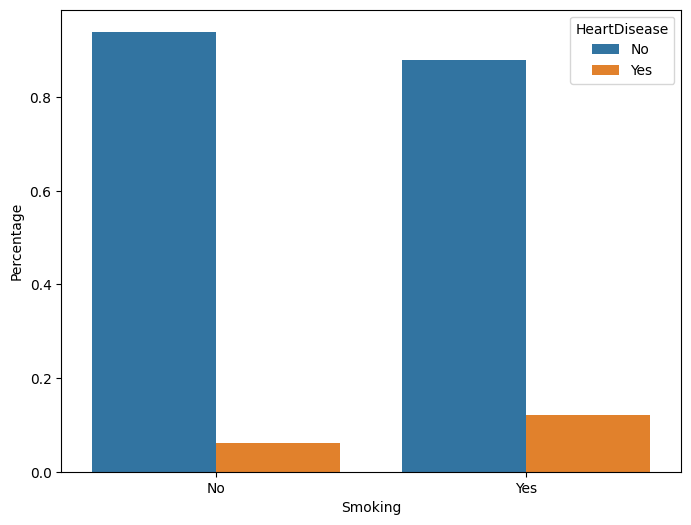

In [25]:
plot_categorical_barplot(heart_attack_2020, 'Smoking', 'HeartDisease')

The number of people of hadn't had an heart attack in our dataset is bigger than the number of people who hadn't, hence the difference in value between "No heart attack and heart attack". Anyway we can see that the percentage of people that never smoked and had an heart attack is evidently inferior ro the others.

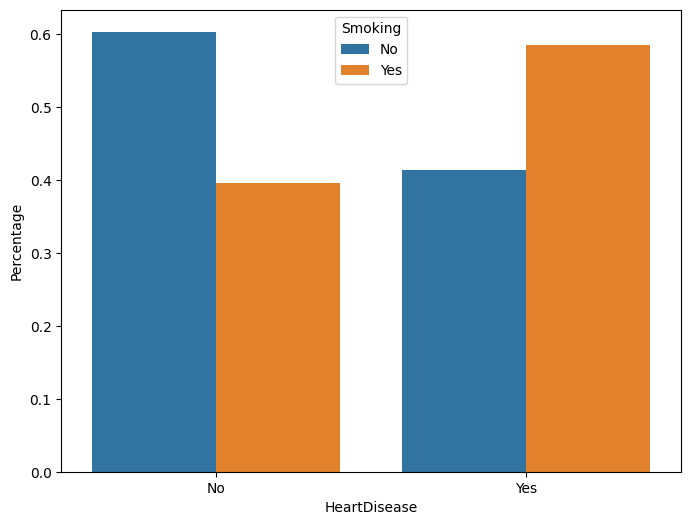

In [26]:
plot_categorical_barplot(heart_attack_2020,'HeartDisease', 'Smoking')

Smoking           No     Yes
HeartDisease                
No            176551  115871
Yes            11336   16037


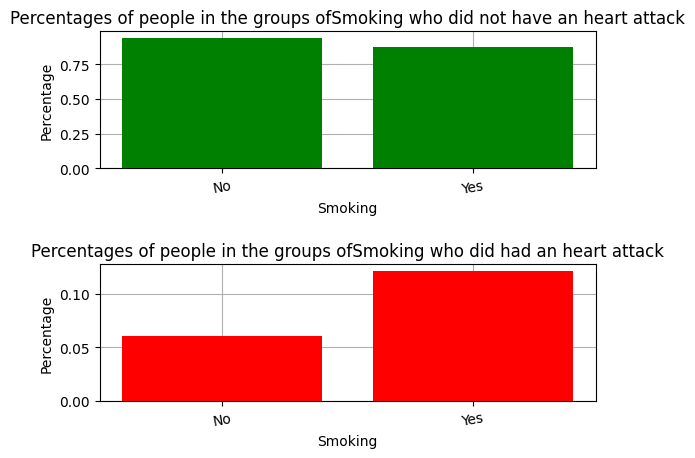

In [27]:
plot_pivot_tab(heart_attack_2020, 'Smoking', 'HeartDisease', rotation=10, distance=0.7)

It is evident that smoking increases the risk of heart attack.

## Alcohol

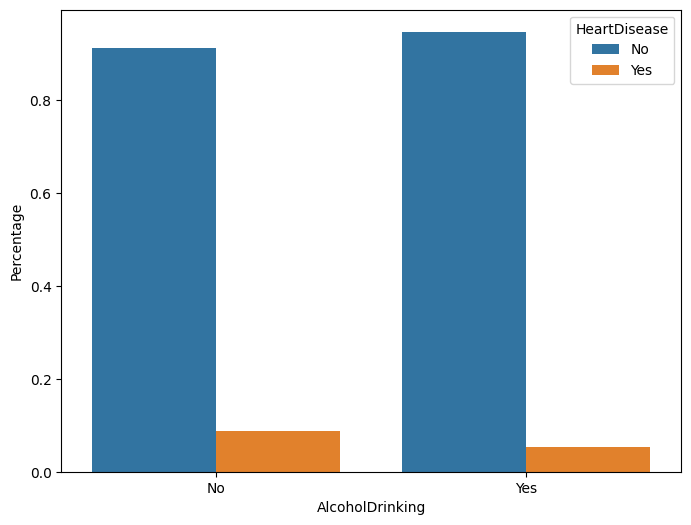

In [28]:
plot_categorical_barplot(heart_attack_2020, 'AlcoholDrinking', 'HeartDisease')

AlcoholDrinking      No    Yes
HeartDisease                  
No               271786  20636
Yes               26232   1141


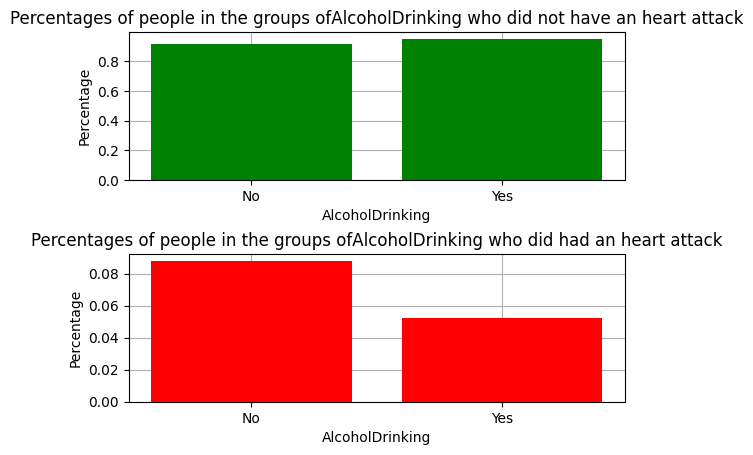

In [29]:
plot_pivot_tab(heart_attack_2020, 'AlcoholDrinking', 'HeartDisease', rotation=0)

### Alcohol and age

C:\Users\Hp\AppData\Local\Temp\ipykernel_7424\3710347480.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = heart_attack_2020.groupby(['AgeGroup','AlcoholDrinking']).size().unstack(fill_value=0)


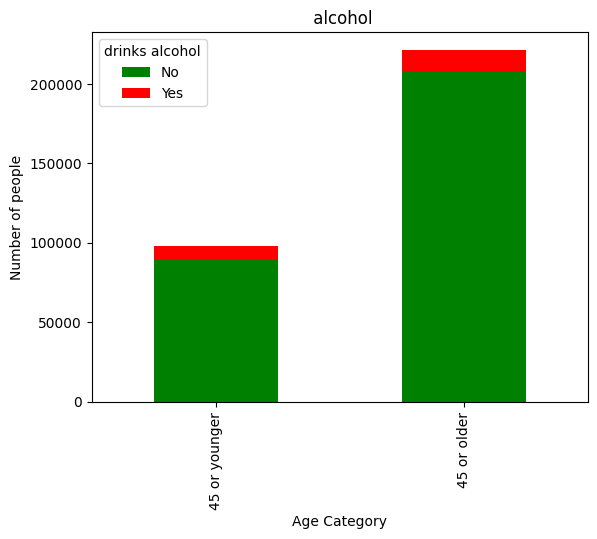

In [30]:
def convert_age_category(age_category):
    if 'or older' in age_category:
        return float('inf')
    elif 'or younger' in age_category:
        return -float('inf')
    else:
        return float(age_category.split('-')[0])

# Apply the conversion function to 'AgeCategory'
heart_attack_2020['AgeGroup'] = pd.cut(heart_attack_2020['AgeCategory'].apply(convert_age_category),
                        bins=[-float('inf'), 44, float('inf')],
                        labels=['45 or younger', '45 or older'])
df_counts = heart_attack_2020.groupby(['AgeGroup','AlcoholDrinking']).size().unstack(fill_value=0)

# Plotting the histogram
ax = df_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
# Adding labels and titles
plt.xlabel('Age Category')
plt.ylabel('Number of people')
plt.title(' alcohol')
plt.legend(title='drinks alcohol', labels=['No', 'Yes'])
plt.show()

From the statistics in this dataset it appears that drinking alchool prevents heart attacks. It obviously is noyt true and it is probably due to the following reason:

* The dataset doesn't distinguish among no drinkers, people who drink sporadically, people who drink often and alcholics. This might have made the statistic imprecise.

For this reason this field will be removed from the dataset

## Stroke

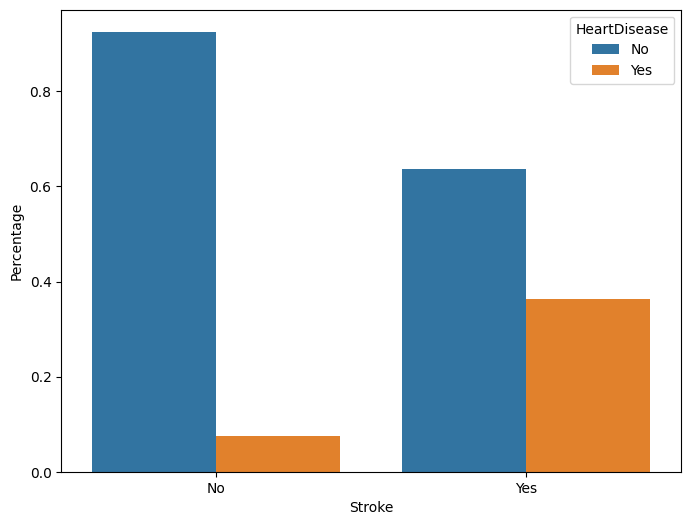

In [31]:
plot_categorical_barplot(heart_attack_2020, 'Stroke', 'HeartDisease')

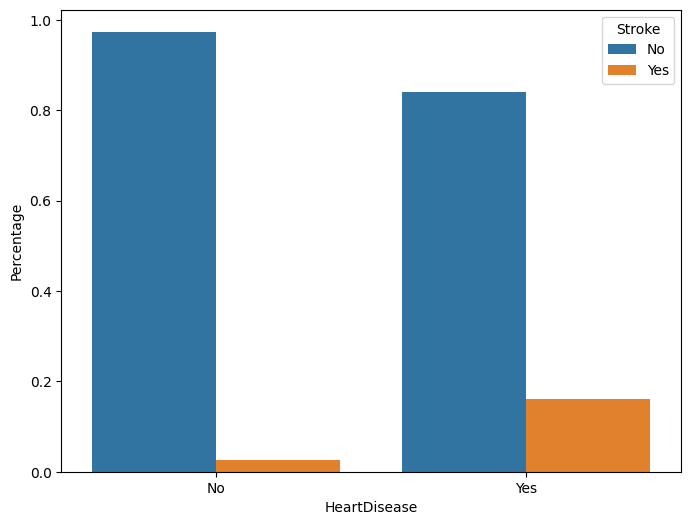

In [32]:
plot_categorical_barplot(heart_attack_2020,'HeartDisease', 'Stroke')

Stroke            No   Yes
HeartDisease              
No            284742  7680
Yes            22984  4389


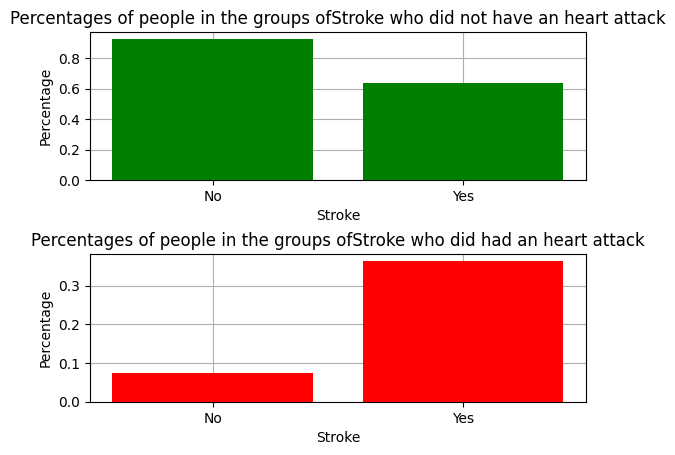

In [33]:
plot_pivot_tab(heart_attack_2020, 'Stroke', 'HeartDisease', rotation=0)

As expected strokes are an indicator of heart diseases

## Physical Health

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


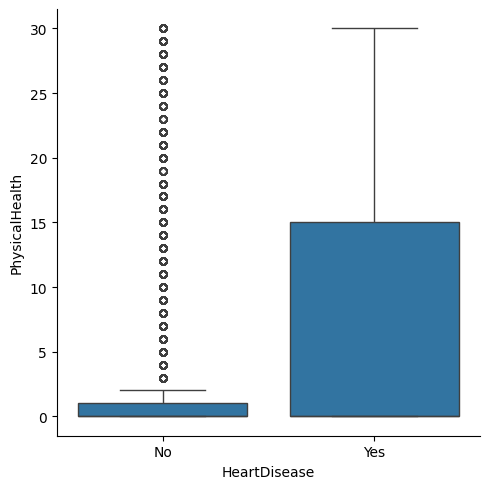

In [34]:
sns.catplot(x='HeartDisease', y="PhysicalHealth",
            data=heart_attack_2020,
            kind="box",
)

It's clear that having phisical health < 3 is an indicator of a healthy heart 

Mental Health

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


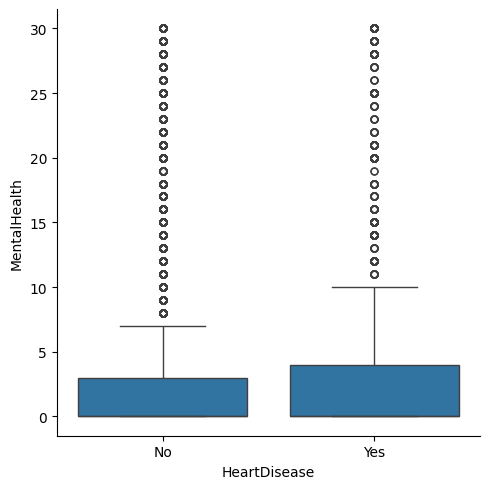

In [35]:
sns.catplot(x='HeartDisease', y="MentalHealth",
            data=heart_attack_2020,
            kind="box",
)

Difficoulty Walking

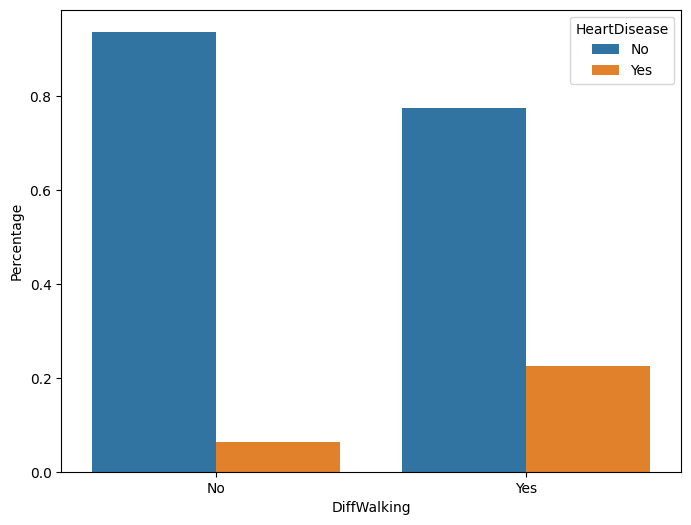

In [36]:
plot_categorical_barplot(heart_attack_2020, 'DiffWalking', 'HeartDisease')

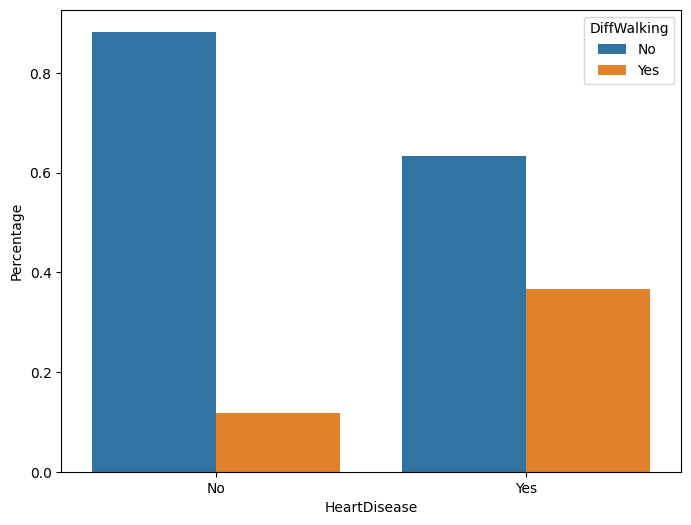

In [37]:
plot_categorical_barplot(heart_attack_2020,'HeartDisease', 'DiffWalking')

DiffWalking       No    Yes
HeartDisease               
No            258040  34382
Yes            17345  10028


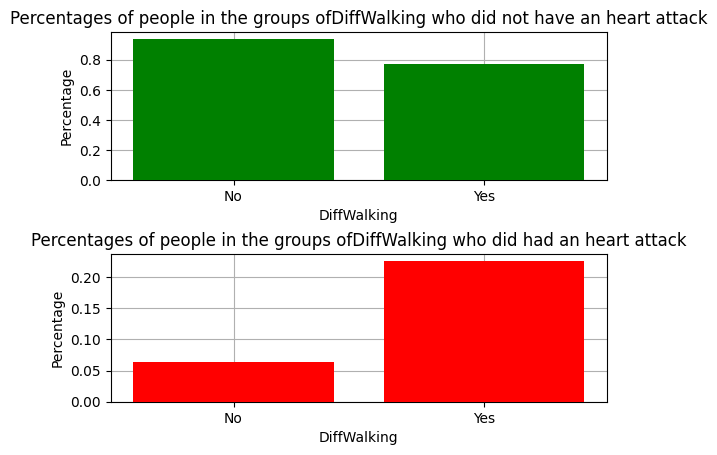

In [38]:
plot_pivot_tab(heart_attack_2020, 'DiffWalking', 'HeartDisease', rotation=0)

## Race	

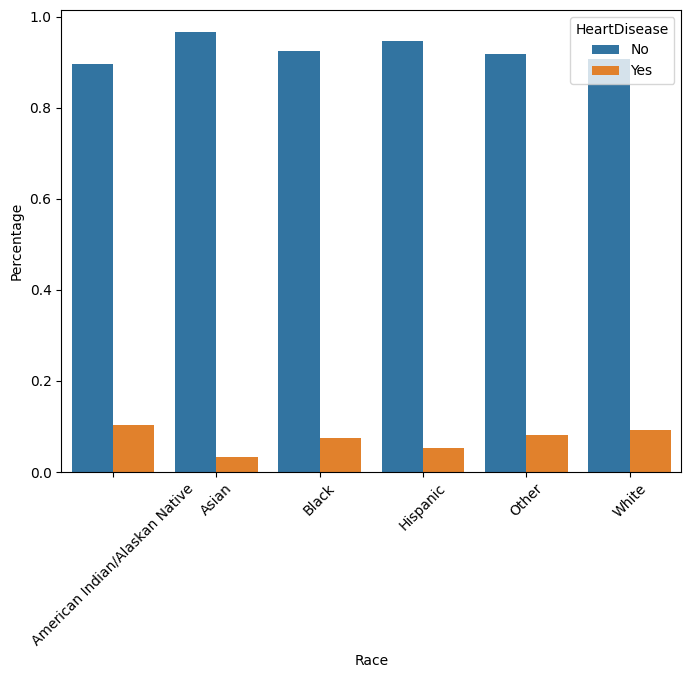

In [39]:
plot_categorical_barplot(heart_attack_2020, 'Race', 'HeartDisease', rotation=45)

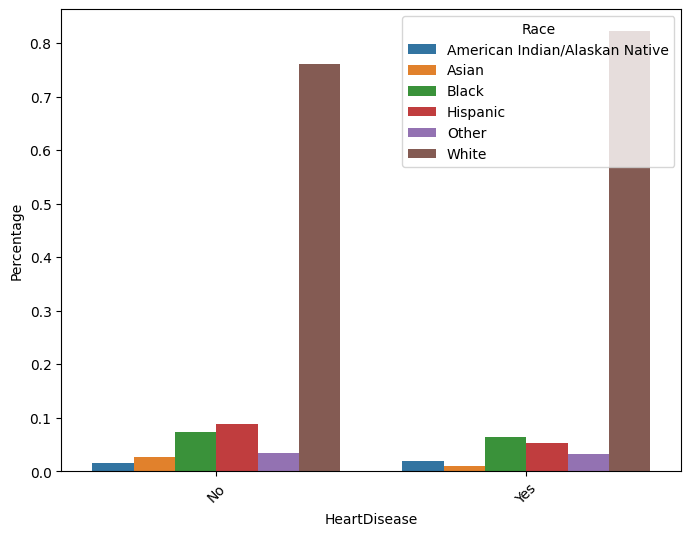

In [40]:
plot_categorical_barplot(heart_attack_2020, 'HeartDisease','Race', rotation=45)

## Diabetis

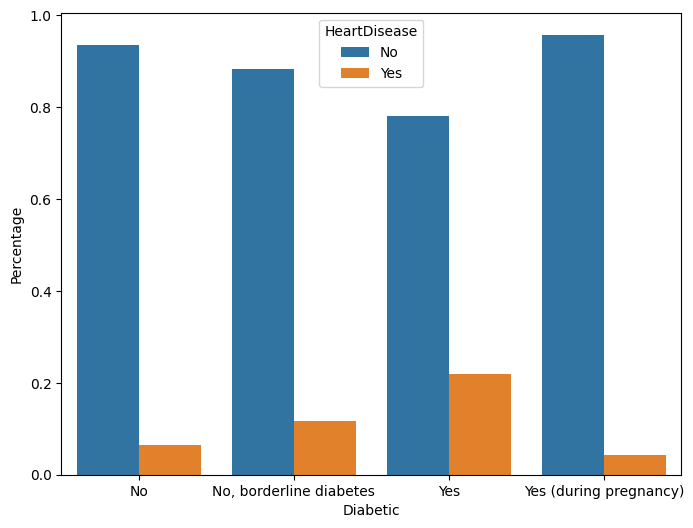

In [41]:
plot_categorical_barplot(heart_attack_2020, 'Diabetic', 'HeartDisease')

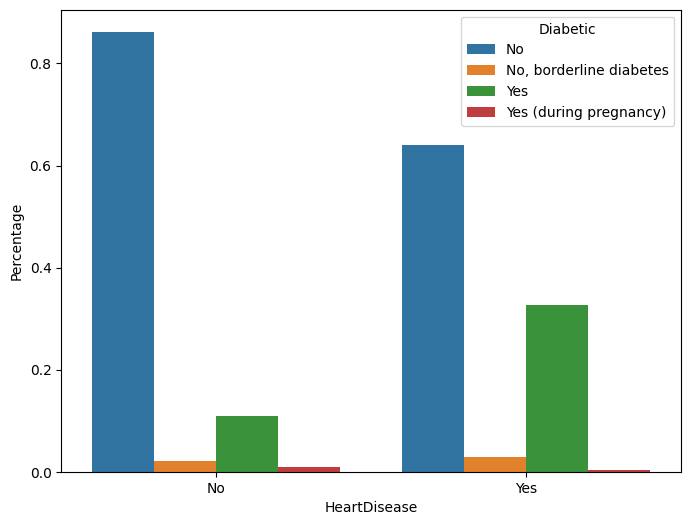

In [42]:
plot_categorical_barplot(heart_attack_2020, 'HeartDisease', 'Diabetic')

Diabetic          No  No, borderline diabetes    Yes  Yes (during pregnancy)
HeartDisease                                                                
No            252134                     5992  31845                    2451
Yes            17519                      789   8957                     108


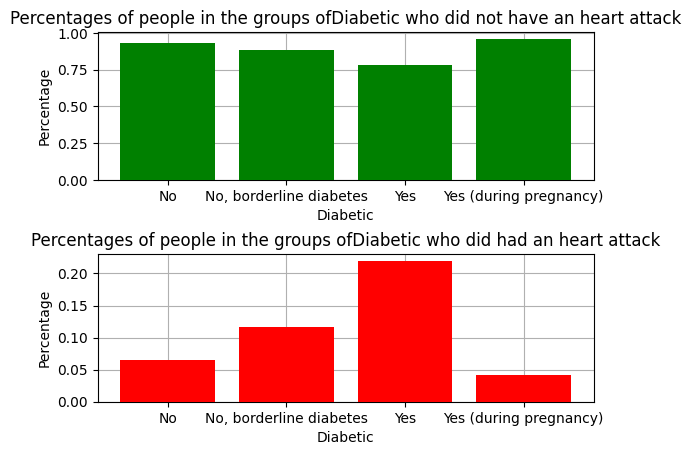

In [43]:
plot_pivot_tab(heart_attack_2020, 'Diabetic', 'HeartDisease', rotation=0)

## Physical Activity

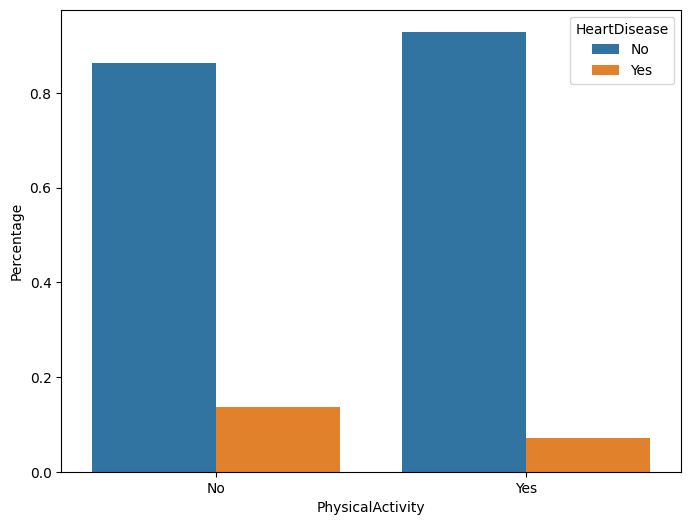

In [44]:
plot_categorical_barplot(heart_attack_2020, 'PhysicalActivity', 'HeartDisease')

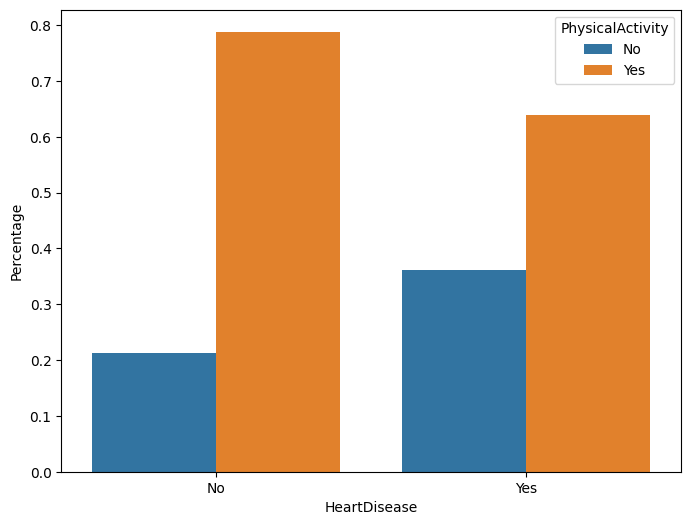

In [45]:
plot_categorical_barplot(heart_attack_2020, 'HeartDisease', 'PhysicalActivity')

PhysicalActivity     No     Yes
HeartDisease                   
No                61954  230468
Yes                9884   17489


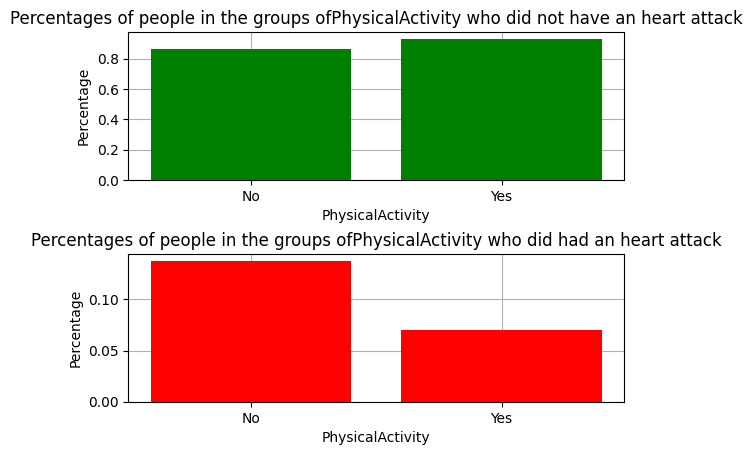

In [46]:
plot_pivot_tab(heart_attack_2020, 'PhysicalActivity', 'HeartDisease', rotation=0)

## General Health

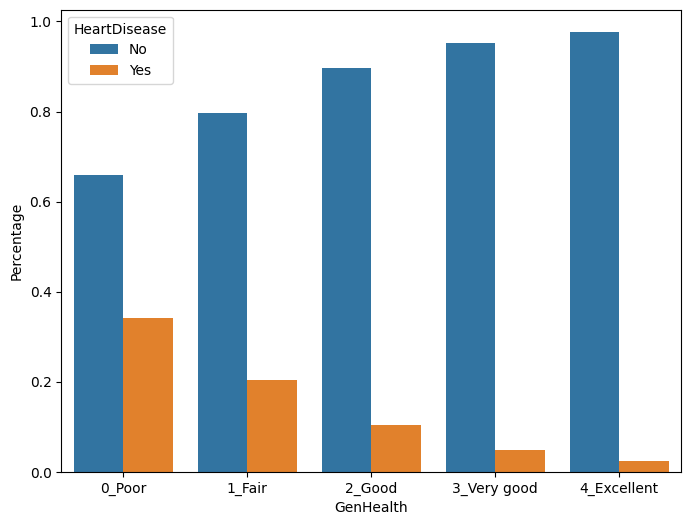

In [47]:
plot_categorical_barplot(heart_attack_2020, 'GenHealth', 'HeartDisease')

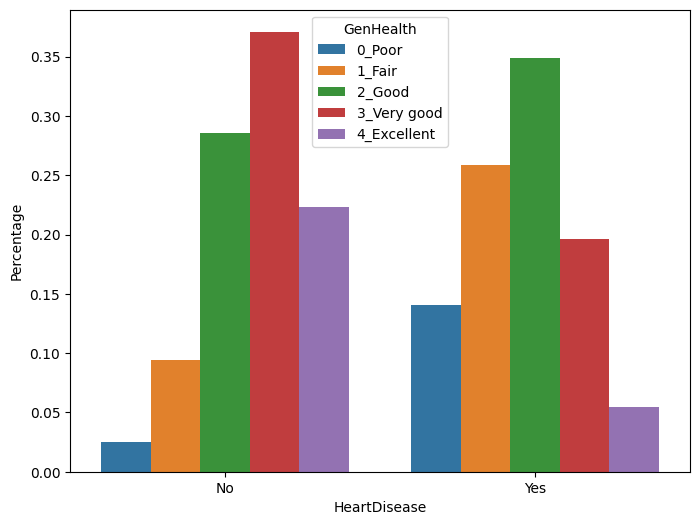

In [48]:
plot_categorical_barplot(heart_attack_2020, 'HeartDisease', 'GenHealth')

GenHealth     0_Poor  1_Fair  2_Good  3_Very good  4_Excellent
HeartDisease                                                  
No              7439   27593   83571       108477        65342
Yes             3850    7084    9558         5381         1500


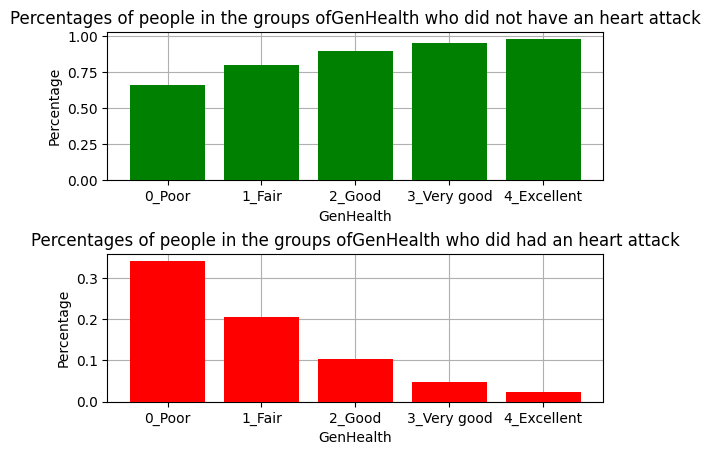

In [49]:
plot_pivot_tab(heart_attack_2020, 'GenHealth', 'HeartDisease', rotation=0)